In [2]:
import sys
sys.path.append("../functions")
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from utils import *
import scipy.io as sio
import statsmodels.api as sm
import scipy
from statsmodels.stats.multitest import multipletests

In [11]:
file = pd.read_csv("../data/info/Sensorimotor_Association_Axis_AverageRanks.csv")
sa_rank = file['finalrank.wholebrain'].values
region2index_dict, index2region_dict, name = get_intrinsic_index(if_left_right=False)

In [4]:
with open('../data/result_out_2/HCPA/SC/HCPA_roi_gp_ind_t_p_75.pickle',
              'rb') as out_data:
    (HCPA_SC_FC_match_roi, HCPA_SC_FC_mismatch_roi, HCPA_SC_FC_gp_roi, HCPA_SC_FC_ind_roi, HCPA_SC_FC_ind_t_roi, HCPA_SC_FC_ind_p_roi) = pickle.load(out_data)

with open('../data/result_out_2/HCPA/Pred/HCPA_roi_gp_ind_t_p.pickle',
              'rb') as out_data:
    (HCPA_predFC_FC_match_roi, HCPA_predFC_FC_mismatch_roi, HCPA_predFC_FC_gp_roi, HCPA_predFC_FC_ind_roi, HCPA_predFC_FC_ind_t_roi, HCPA_predFC_FC_ind_p_roi) = pickle.load(out_data)

with open('../data/result_out_2/HCPD/SC/HCPD_roi_gp_ind_t_p_75.pickle',
              'rb') as out_data:
    (HCPD_SC_FC_match_roi, HCPD_SC_FC_mismatch_roi, HCPD_SC_FC_gp_roi, HCPD_SC_FC_ind_roi, HCPD_SC_FC_ind_t_roi, HCPD_SC_FC_ind_p_roi) = pickle.load(out_data)

with open('../data/result_out_2/HCPD/Pred/HCPD_roi_gp_ind_t_p.pickle',
              'rb') as out_data:
    (HCPD_predFC_FC_match_roi, HCPD_predFC_FC_mismatch_roi, HCPD_predFC_FC_gp_roi, HCPD_predFC_FC_ind_roi, HCPD_predFC_FC_ind_t_roi, HCPD_predFC_FC_ind_p_roi) = pickle.load(out_data)

with open('../data/result_out_2/ABCD/SC/ABCD_roi_gp_ind_t_p_75.pickle',
              'rb') as out_data:
    (ABCD_SC_FC_match_roi, ABCD_SC_FC_mismatch_roi, ABCD_SC_FC_gp_roi, ABCD_SC_FC_ind_roi, ABCD_SC_FC_ind_t_roi, ABCD_SC_FC_ind_p_roi) = pickle.load(out_data)

with open('../data/result_out_2/ABCD/Pred/ABCD_roi_gp_ind_t_p.pickle',
              'rb') as out_data:
    (ABCD_predFC_FC_match_roi, ABCD_predFC_FC_mismatch_roi, ABCD_predFC_FC_gp_roi, ABCD_predFC_FC_ind_roi, ABCD_predFC_FC_ind_t_roi, ABCD_predFC_FC_ind_p_roi) = pickle.load(out_data)


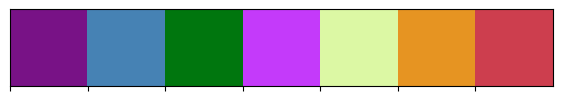

In [5]:
yeo_colors = [(120/255, 18/255, 134/255),
          (70/255, 130/255, 180/255),
          (0/255, 118/255, 14/255),
          (196/255, 58/255, 250/255),
          (220/255, 248/255, 164/255),
          (230/255, 148/255, 34/255),
          (205/255, 62/255, 78/255)]
sns.set_palette(sns.color_palette(yeo_colors))
sns.palplot(sns.color_palette())
plt.show()

In [6]:
def plot_gp(sa_rank, predFC_FC_ind_roi, p_spin, save=False, save_path=None):
    plt.rcParams['font.family'] = 'Arial'
    plt.rcParams['font.size'] = 18
    palette = sns.color_palette()
    x_scatter = np.array(sa_rank, dtype=float)

    x_scatter_min = np.min(x_scatter)
    x_scatter_max = np.max(x_scatter)
    y_scatter = predFC_FC_ind_roi


    intrinsic_region_index = [name[index2region_dict[i]] for i in range(400)]
    fig, ax = plt.subplots(figsize=(7,4.5))
    sns.regplot(x=x_scatter, y=y_scatter, scatter=False, ci=95, color='k' , line_kws={'alpha':0.8, 'linewidth':2})
    sns.scatterplot(x=x_scatter, y=y_scatter, hue=intrinsic_region_index, palette=palette, alpha=0.7)
    plt.grid(False)
    plt.xlabel('SA rank')
    plt.ylabel('Group effect')
    plt.xlim([x_scatter_min-10,x_scatter_max+10])
    if p_spin<0.0001:
        ann = r'$r_s$'+ '=' + str(round(stats.spearmanr(x_scatter, y_scatter)[0], 2)) + '\n' + r'$p_{spin}$'+ '<0.0001'
    else:
        ann = r'$r_s$'+ '=' + str(round(stats.spearmanr(x_scatter, y_scatter)[0], 2)) + '\n' + r'$p_{spin}$'+ '=' + str(round(p_spin, 4))
    plt.annotate(ann,xy=(0.1,0.2), fontsize=14, xycoords='axes fraction')
    plt.tight_layout()
    ax.tick_params(bottom=True, left=True, width=1)
    sns.despine()
    # plt.legend(loc = 2, bbox_to_anchor = (1,1))
    fig.subplots_adjust(right=0.7)
    ax.legend_.remove()
    if save:
        fig.savefig(save_path,transparent=True, dpi=360)
    plt.show()

In [ ]:
def plot_network(predFC_FC_gp_roi, save=False, save_path=None):

    palette = sns.color_palette()
    pred_FC_seven_corr = pd.DataFrame(columns=['name', 'corr'])
    mean_pred_FC_node_corr_r = predFC_FC_gp_roi
    for i in range(400):
        region = index2region_dict[i]
        temp_corr_1 = mean_pred_FC_node_corr_r[i]
        temp_pd = pd.DataFrame({'Intrinsic network': [name[region]], 'Individual effect':[temp_corr_1]})
        pred_FC_seven_corr = pd.concat([pred_FC_seven_corr, temp_pd])

    fig, ax = plt.subplots(figsize=(5.5,4.5))
    sns.violinplot(x="Intrinsic network",
                   y="Individual effect",
                   data=pred_FC_seven_corr,
                   order=name,
                   inner="quartile",
                   palette=palette,
                   )
    plt.xticks(rotation=-30)
    plt.grid(False)
    ax.tick_params(bottom=True, left=True, width=1)

    if save:
        plt.savefig(save_path, transparent=True, bbox_inches='tight', dpi=360)
    plt.show()

In [13]:
from enigmatoolbox.permutation_testing import spin_test

HCPA_predFC_sa_spin_p_gp, _ = spin_test(HCPA_predFC_FC_gp_roi, sa_rank, surface_name='fsa5',
                      parcellation_name='schaefer_400', type='spearman', n_rot=10000, null_dist=True)
HCPD_predFC_sa_spin_p_gp, _ = spin_test(HCPD_predFC_FC_gp_roi, sa_rank, surface_name='fsa5',
                      parcellation_name='schaefer_400', type='spearman', n_rot=10000, null_dist=True)
ABCD_predFC_sa_spin_p_gp, _ = spin_test(ABCD_predFC_FC_gp_roi, sa_rank, surface_name='fsa5',
                      parcellation_name='schaefer_400', type='spearman', n_rot=10000, null_dist=True)
print(HCPA_predFC_sa_spin_p_gp, HCPD_predFC_sa_spin_p_gp, ABCD_predFC_sa_spin_p_gp)

permutation 100 of 10000
permutation 200 of 10000
permutation 300 of 10000
permutation 400 of 10000
permutation 500 of 10000
permutation 600 of 10000
permutation 700 of 10000
permutation 800 of 10000
permutation 900 of 10000
permutation 1000 of 10000
permutation 1100 of 10000
permutation 1200 of 10000
permutation 1300 of 10000
permutation 1400 of 10000
permutation 1500 of 10000
permutation 1600 of 10000
permutation 1700 of 10000
permutation 1800 of 10000
permutation 1900 of 10000
permutation 2000 of 10000
permutation 2100 of 10000
permutation 2200 of 10000
permutation 2300 of 10000
permutation 2400 of 10000
permutation 2500 of 10000
permutation 2600 of 10000
permutation 2700 of 10000
permutation 2800 of 10000
permutation 2900 of 10000
permutation 3000 of 10000
permutation 3100 of 10000
permutation 3200 of 10000
permutation 3300 of 10000
permutation 3400 of 10000
permutation 3500 of 10000
permutation 3600 of 10000
permutation 3700 of 10000
permutation 3800 of 10000
permutation 3900 of 1

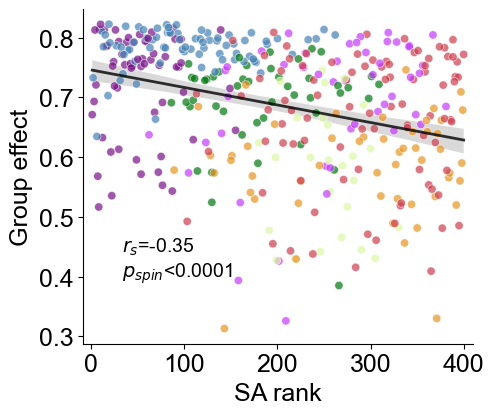

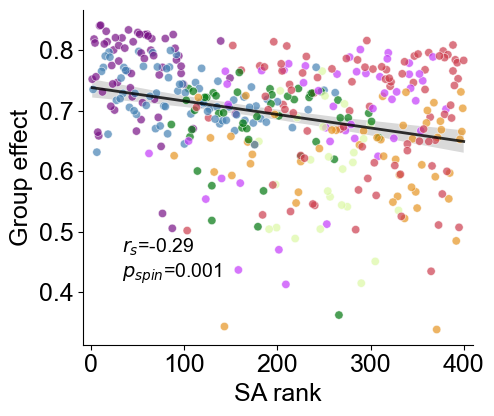

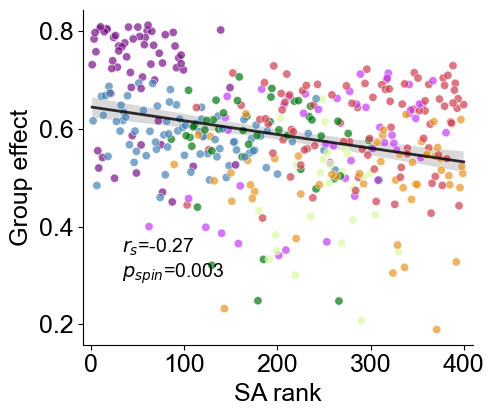

In [12]:
plot_gp(sa_rank, HCPA_predFC_FC_gp_roi, HCPA_predFC_sa_spin_p_gp, False, "result_plot/Fig4/HCPA_predFC_gp_sa.png")
plot_gp(sa_rank, HCPD_predFC_FC_gp_roi, HCPD_predFC_sa_spin_p_gp, False, "result_plot/Fig4/HCPD_predFC_gp_sa.png")
plot_gp(sa_rank, ABCD_predFC_FC_gp_roi, ABCD_predFC_sa_spin_p_gp, False, "result_plot/Fig4/ABCD_predFC_gp_sa.png")

In [ ]:
HCPA_SC_sa_spin_p_gp, _ = spin_test(HCPA_SC_FC_gp_roi, sa_rank, surface_name='fsa5',
                      parcellation_name='schaefer_400', type='spearman', n_rot=1000, null_dist=True)
HCPD_SC_sa_spin_p_gp, _ = spin_test(HCPD_SC_FC_gp_roi, sa_rank, surface_name='fsa5',
                      parcellation_name='schaefer_400', type='spearman', n_rot=1000, null_dist=True)
ABCD_SC_sa_spin_p_gp, _ = spin_test(ABCD_SC_FC_gp_roi, sa_rank, surface_name='fsa5',
                      parcellation_name='schaefer_400', type='spearman', n_rot=1000, null_dist=True)

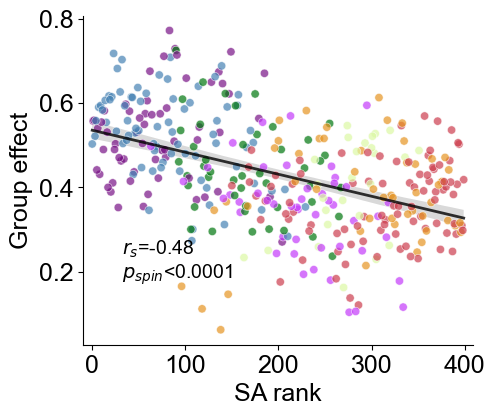

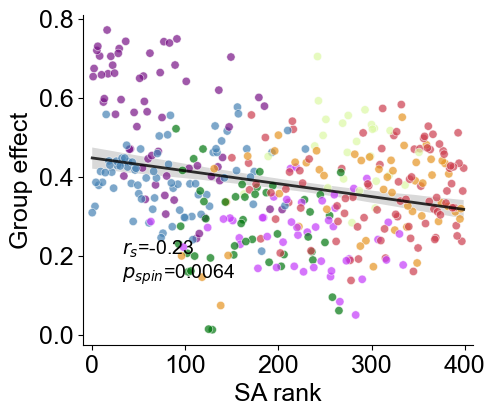

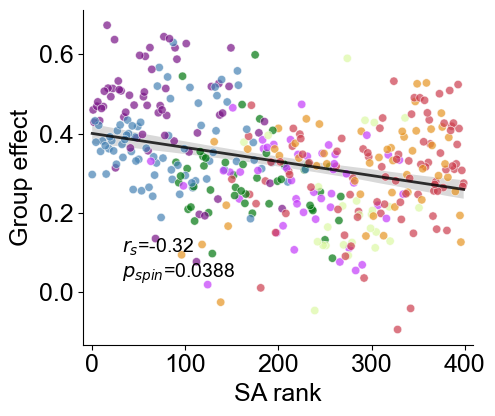

In [299]:
plot_gp(sa_rank, HCPA_SC_FC_gp_roi, HCPA_SC_sa_spin_p_gp)
plot_gp(sa_rank, HCPD_SC_FC_gp_roi, HCPD_SC_sa_spin_p_gp)
plot_gp(sa_rank, ABCD_SC_FC_gp_roi, ABCD_SC_sa_spin_p_gp)

/var/folders/9s/wnnzhx9x70101x6g_jm5k8dc0000gn/T/ipykernel_20999/3008934101.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Intrinsic network",  # 指定x轴的数据


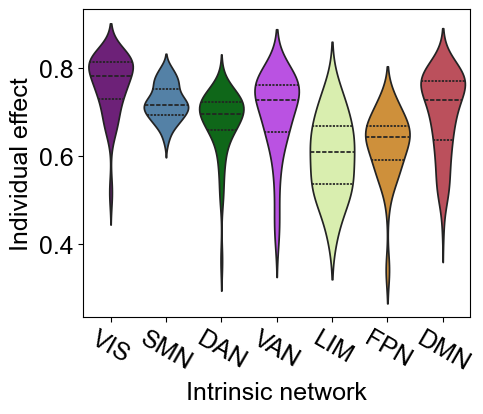

In [37]:
plot_network(HCPA_predFC_FC_gp_roi)
plot_network(HCPD_predFC_FC_gp_roi)
plot_network(ABCD_predFC_FC_gp_roi)